In [1]:
%matplotlib inline

In [2]:
import pyathena as pa
from pyathena.set_plt import *

In [3]:
import glob

In [4]:
def norm_log_hist_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.bar(edges[:-1],hist,np.diff(edges),align='edge',**kwargs)
def norm_log_line_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.plot(edges[:-1]+0.5*np.diff(edges),hist,**kwargs)

In [5]:
def plot_sf_mass_func(sf):

    sp=pa.read_starvtk(sf)

    plt.ylim(0.5,100)
    plt.xlim(2,7)
    plt.yscale('log')

    if len(sp) >0:
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2)]
            cl_young=sp[(sp.mass > 0) & (sp.flag > -2) & (sp.mage*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.flag == -2)]
        else:
            cl=sp[(sp.mass > 0) & (sp.age < sp.time)]
            cl_young=sp[(sp.mass > 0) & (sp.age < sp.time) & (sp.age*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.age > sp.time)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=50)
        cl_young_hist,cl_young_edges=np.histogram(np.log10(cl_young.mass*units['Msun']),range=[2,7],bins=50)
        cl_ini_hist,cl_ini_edges=np.histogram(np.log10(cl_ini.mass*units['Msun']),range=[2,7],bins=50)

        norm_log_hist_plot(cl_ini_hist,cl_ini_edges,alpha=0.5,label='initial clusters',color='C0')
        norm_log_hist_plot(cl_hist,cl_edges,alpha=0.8,label='all new clusters',color='C1')
        norm_log_hist_plot(cl_young_hist,cl_young_edges,label='new young clusters',color='C2')

        plt.text(6.,10,'t={:6.2f}Myr'.format(sp.time[0]*units['Myr']))

In [6]:
def calc_normed_mass_funct(sf,trange=None,bins=50):

    sp=pa.read_starvtk(sf)

    if len(sp) >0:
        if trange == None:
            t1 = 0
            t2 = sp.time[0]
        else:
            t1,t2 = trange
        birth_time = sp.time-sp.age
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2) & (birth_time > t1) & (birth_time < t2)]
        else:
            cl=sp[(sp.mass > 0) & (birth_time > t1) & (birth_time < t2)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=bins)

        return cl_hist, cl_edges, sp.time[0]*units['Myr']


In [9]:
dirs=glob.glob('{}/R*acc*/starpar'.format(base))+glob.glob('{}/R*rst/starpar'.format(base))+glob.glob('{}/R*B1/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print ids
#pid='R2_4pc_noacc_largebox'
#ids=['R2_4pc_noacc_largebox']

['R2_2pc_newacc', 'R2_2pc_newacc2', 'R4_4pc_newacc', 'RPS_8pc_ICM2_newacc', 'R2_1pc_newacc', 'R8_4pc_newacc', 'R8_16pc_newacc', 'RPS_4pc_ICM1_newacc', 'RPS_8pc_ICM0_newacc', 'RPS_8pc_ICM3_newacc', 'RPS_4pc_ICM2_newacc', 'R2_2pc_newacc_largebox', 'R4_2pc_newacc', 'R4_4pc_newacc_largebox', 'R2_4pc_newacc_largebox', 'R8_8pc_newacc', 'RPS_8pc_noICM_newacc', 'RPS_8pc_ICM1_newacc', 'R8_8pc_newacc2', 'R4_4pc_rst_newacc', 'R2_2pc_rst', 'R8_2pc_rst', 'R4_4pc_rst', 'R8_8pc_rst', 'R2_2pc_B1', 'R2_4pc_B1']


R2_2pc_newacc 134 134
R2_2pc_newacc2 135 135
R2_1pc_newacc 120 120
R8_4pc_newacc 675 371
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0371.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0372.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0373.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0374.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0375.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0376.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0377.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0378.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0379.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0380.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0381.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0382.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0383.

/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0486.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0487.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0488.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0489.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0490.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0491.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0492.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0493.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0494.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0495.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0496.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0497.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0498.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0499.starpar.vtk
/tigre

/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0602.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0603.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0604.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0605.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0606.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0607.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0608.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0609.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0610.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0611.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0612.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0613.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0614.starpar.vtk
/tigress/changgoo/R8_4pc_newacc/starpar/R8_4pc_newacc.0615.starpar.vtk
/tigre

/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0217.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0218.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0219.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0220.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0221.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0222.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0223.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0224.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0225.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0226.starpar.vtk
/tigress/changgoo/R2_2pc_newacc_largebox/starpar/R2_2pc_newacc_largebox.0227.starpar.vtk
/tigress/changgoo/R2_

/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0210.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0211.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0212.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0213.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0214.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0215.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0216.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0217.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0218.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0219.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0220.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0221.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0222.starpar.vtk
/tigress/changgoo/R4_2pc_newacc/starpar/R4_2pc_newacc.0223.starpar.vtk
/tigre

/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0110.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0111.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0112.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0113.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0114.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0115.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0116.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0117.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0118.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0119.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0120.starpar.vtk
/tigress/changgoo/R4_

/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0203.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0204.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0205.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0206.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0207.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0208.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0209.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0210.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0211.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0212.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0213.starpar.vtk
/tigress/changgoo/R4_

/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0296.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0297.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0298.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0299.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0300.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0301.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0302.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0303.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0304.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0305.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0306.starpar.vtk
/tigress/changgoo/R4_

/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0389.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0390.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0391.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0392.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0393.starpar.vtk
/tigress/changgoo/R4_4pc_newacc_largebox/starpar/R4_4pc_newacc_largebox.0394.starpar.vtk
R2_4pc_newacc_largebox 241 0
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0000.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0001.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0002.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0003.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0004.star

/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0086.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0087.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0088.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0089.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0090.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0091.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0092.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0093.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0094.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0095.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0096.starpar.vtk
/tigress/changgoo/R2_

/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0179.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0180.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0181.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0182.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0183.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0184.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0185.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0186.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0187.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0188.starpar.vtk
/tigress/changgoo/R2_4pc_newacc_largebox/starpar/R2_4pc_newacc_largebox.0189.starpar.vtk
/tigress/changgoo/R2_

/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0138.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0139.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0140.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0141.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0142.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0143.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0144.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0145.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0146.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0147.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/starpar/R2_4pc_noacc_largebox.0148.starpar.vtk
/tigress/changgoo/R2_4pc_noacc_largebox/sta

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0034.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0035.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0036.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0037.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0038.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0039.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0040.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0041.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0042.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0043.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0044.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0045.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0046.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0047.starpar.vtk
/tigre

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0150.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0151.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0152.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0153.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0154.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0155.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0156.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0157.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0158.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0159.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0160.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0161.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0162.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0163.starpar.vtk
/tigre

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0266.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0267.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0268.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0269.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0270.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0271.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0272.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0273.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0274.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0275.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0276.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0277.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0278.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0279.starpar.vtk
/tigre

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0382.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0383.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0384.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0385.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0386.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0387.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0388.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0389.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0390.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0391.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0392.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0393.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0394.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0395.starpar.vtk
/tigre

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0498.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0499.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0500.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0501.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0502.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0503.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0504.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0505.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0506.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0507.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0508.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0509.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0510.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0511.starpar.vtk
/tigre

/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0614.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0615.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0616.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0617.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0618.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0619.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0620.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0621.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0622.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0623.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0624.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0625.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0626.starpar.vtk
/tigress/changgoo/R8_8pc_newacc/starpar/R8_8pc_newacc.0627.starpar.vtk
/tigre

/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0274.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0275.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0276.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0277.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0278.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0279.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0280.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0281.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0282.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0283.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0284.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newa

/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0371.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0372.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0373.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0374.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0375.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0376.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0377.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0378.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0379.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0380.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0381.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newa

/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0468.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0469.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0470.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0471.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0472.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0473.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0474.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0475.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0476.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0477.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newacc.0478.starpar.vtk
/tigress/changgoo/RPS_8pc_noICM_newacc/starpar/RPS_8pc_noICM_newa

/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0315.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0316.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0317.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0318.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0319.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0320.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0321.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0322.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0323.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0324.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0325.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0326.starpar.vtk
/tig

/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0414.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0415.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0416.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0417.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0418.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0419.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0420.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0421.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0422.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0423.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0424.starpar.vtk
/tigress/changgoo/RPS_8pc_ICM1_newacc/starpar/RPS_8pc_ICM1_newacc.0425.starpar.vtk
/tig

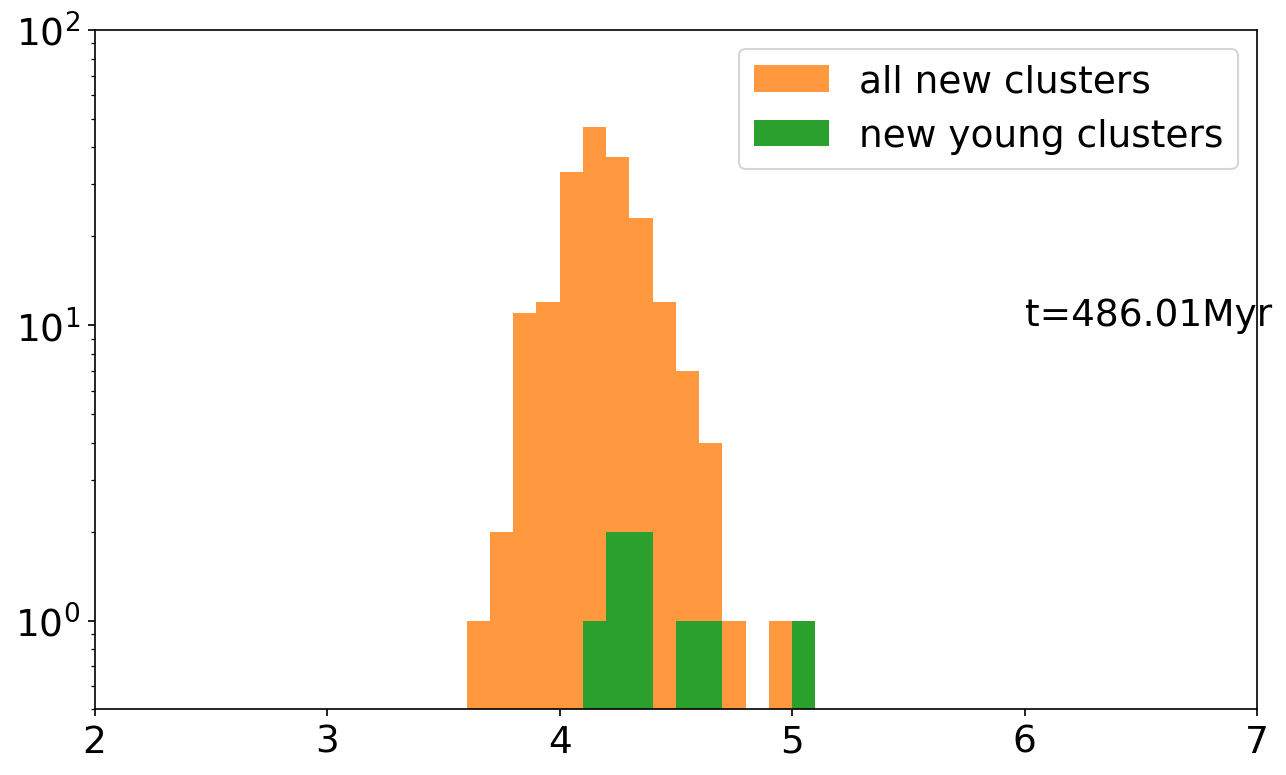

In [10]:
for pid in ids:
    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    png_files=glob.glob('{}{}/starpar/{}.*.starpar.massfunc.png'.format(base,pid,pid))
    nf1=len(starfiles)
    nf2=len(png_files)
    starfiles.sort()
    print pid, nf1, nf2
    if nf1 > nf2:
        for sf in starfiles[nf2:]:
            plt.clf()
            print sf
            plot_sf_mass_func(sf)
            plt.legend()
            plt.savefig('{}massfunc.png'.format(sf.replace('vtk','')))
        

['R8_4pc_newacc', 'R4_4pc_newacc2', 'R4_4pc_newacc_largebox2', 'R4_4pc_newacc_largebox', 'R2_4pc_newacc_largebox', 'R2_4pc_noacc_largebox']


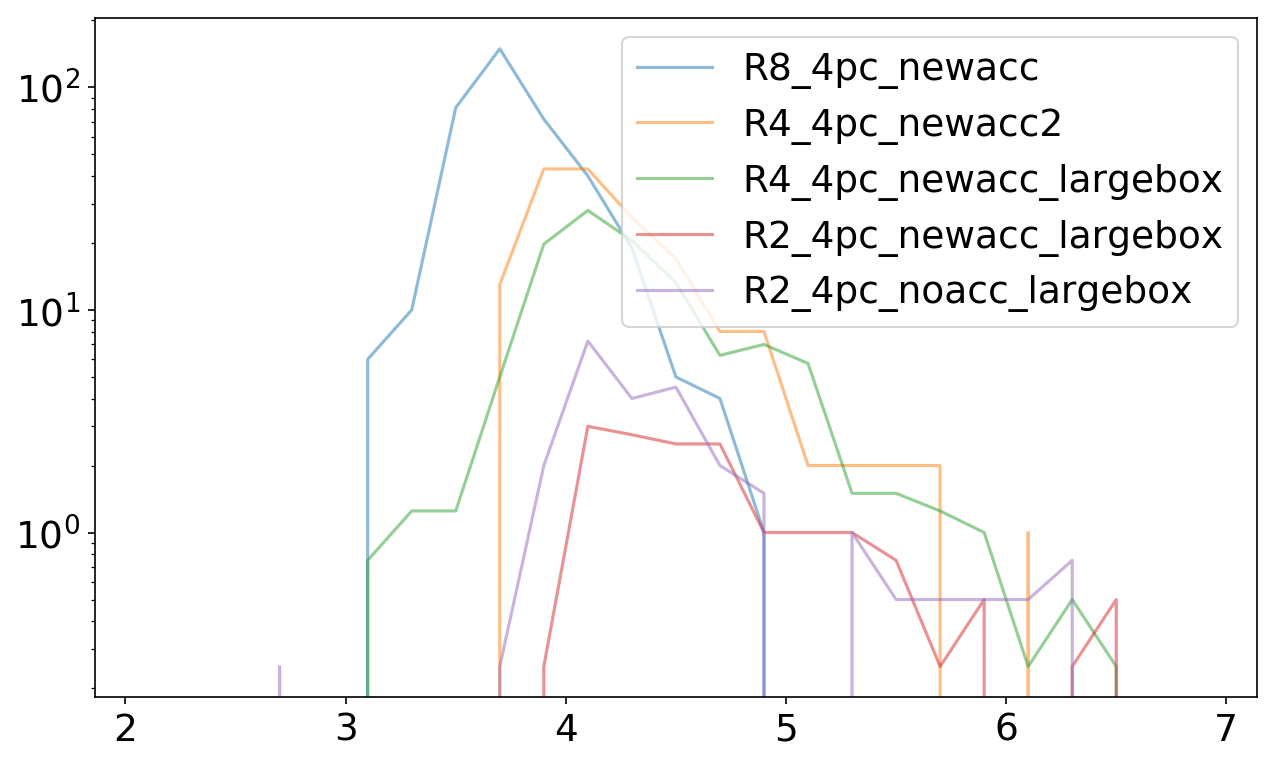

In [39]:
#dirs=glob.glob('{}/R*metal/starpar'.format(base))
dirs=glob.glob('{}/R?_4pc*acc*/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print ids
for pid in ids:

    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    starfiles.sort()
    if len(starfiles) > 0:
        sf=starfiles[-1]
        cl_hist,cl_edges,time=calc_normed_mass_funct(sf,bins=25)
        if pid.endswith('largebox'): cl_hist = cl_hist/4.
        norm_log_line_plot(cl_hist,cl_edges,label=pid,alpha=0.5)
        plt.legend()
        plt.yscale('log')